In [1]:
import numpy as np

# 产生带白噪声的正弦波数据集
X = np.linspace(0, 10, 100).reshape(-1, 1)  # 生成100个样本，1个特征
y = np.sin(X) + 0.1 * np.random.randn(100, 1)  # 添加白噪声
print(y)

[[ 0.01328369]
 [ 0.11230031]
 [ 0.16260014]
 [ 0.25922826]
 [ 0.49857802]
 [ 0.5353774 ]
 [ 0.52419538]
 [ 0.54760209]
 [ 0.68937721]
 [ 0.72241389]
 [ 0.94148447]
 [ 0.94210598]
 [ 0.93089353]
 [ 1.01506005]
 [ 0.77118583]
 [ 0.96066066]
 [ 0.91064584]
 [ 1.07659299]
 [ 0.88396116]
 [ 0.93166996]
 [ 0.99284216]
 [ 0.88823956]
 [ 0.93558765]
 [ 0.64066722]
 [ 0.56779559]
 [ 0.61521283]
 [ 0.62600703]
 [ 0.4205965 ]
 [ 0.38769727]
 [ 0.25278993]
 [-0.0577119 ]
 [-0.04706874]
 [-0.3081552 ]
 [-0.25119678]
 [-0.30786796]
 [-0.41355439]
 [-0.47222626]
 [-0.33709431]
 [-0.51841633]
 [-0.71804716]
 [-0.83483232]
 [-1.07820211]
 [-0.86811038]
 [-0.91127511]
 [-0.94101167]
 [-0.95927398]
 [-1.06488634]
 [-0.99477265]
 [-0.86396236]
 [-1.01665816]
 [-1.0659896 ]
 [-0.86342353]
 [-0.92272906]
 [-0.84808077]
 [-0.71254015]
 [-0.56723435]
 [-0.66503819]
 [-0.45842117]
 [-0.50113296]
 [-0.19875784]
 [-0.19623665]
 [-0.19787894]
 [-0.12319362]
 [ 0.25530553]
 [ 0.19986516]
 [ 0.3861142 ]
 [ 0.31385

d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
d:\py\Anaconda3

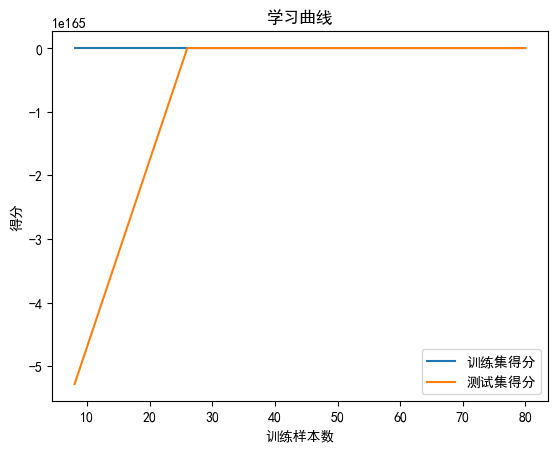

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = [u'simHei']  # 指定中文字体为黑体，防止乱码
plt.rcParams['axes.unicode_minus'] = False     # 使用ASCII字符，保证显示正确

# 先用多项式特征变换（degree=10)扩展特征
poly_features = PolynomialFeatures(degree=10)
X_poly = poly_features.fit_transform(X)  # 扩展特征

# 创建管道
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10)),  # 多项式特征变换
    ('ridge_reg', Ridge(alpha=1))  # 岭回归估计器
])

# 计算学习曲线
train_sizes, train_scores, test_scores = learning_curve(pipeline, X_poly, y, cv=5)

# 计算平均分数
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# 绘制学习曲线
plt.plot(train_sizes, train_scores_mean, label='训练集得分')
plt.plot(train_sizes, test_scores_mean, label='测试集得分')
plt.xlabel('训练样本数')
plt.ylabel('得分')
plt.title('学习曲线')
plt.legend()
plt.show()

d:\py\Anaconda3\envs\mathmodeling\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.07198e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


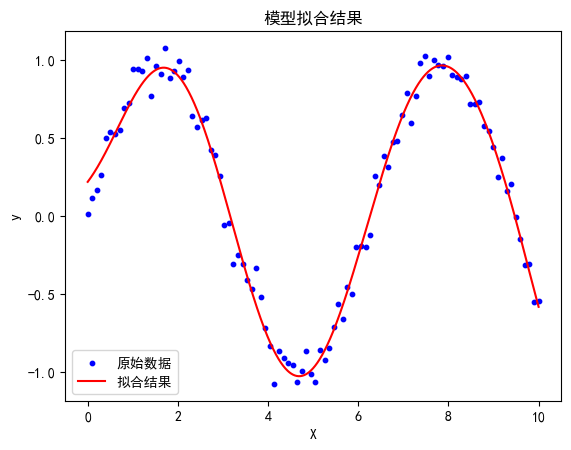

In [6]:
# 先拟合管道
pipeline.fit(X, y)  # 用训练数据拟合模型

# 从[0,10]等间距取1000数据点构成 Xnew
Xnew = np.linspace(0, 10, 1000).reshape(-1, 1)  # 生成1000个样本

# 使用训练好的模型进行预测
y_pred = pipeline.predict(Xnew)  # 预测输出

# 绘制拟合结果
plt.scatter(X, y, label='原始数据', color='blue', s=10)  # 原始数据点
plt.plot(Xnew, y_pred, label='拟合结果', color='red')  # 拟合曲线
plt.xlabel('X')
plt.ylabel('y')
plt.title('模型拟合结果')
plt.legend()
plt.show()